In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels as arima ## For Arima modeling 

In [56]:
file_path = "data\CMO-Historical-Data-Monthly.xlsx"




df = pd.read_excel(file_path, sheet_name='Monthly Prices', skiprows=4, engine='openpyxl')  
# print(df.head())



xls = pd.ExcelFile(file_path, engine='openpyxl')
# print(df.isnull().sum())
# To check for null or missing data

df.rename(columns={"Unnamed: 0": "Year"}, inplace=True)

df = df.drop([0, 1])
# Droped the names of $\bbl

df.replace('…', pd.NA, inplace=True)
# Alot of dotted values (missing) replaced with NA
df.fillna(method='bfill', inplace=True) # backward filling the missing values of coal in Australia and South Africa
# df.fillna(0,inplace=True)

print(df.head(10))

# print(xls.sheet_names)
# To List all sheet names 

       Year  Crude oil, average  Crude oil, Brent  Crude oil, Dubai  \
2   1960M01                1.63              1.63              1.63   
3   1960M02                1.63              1.63              1.63   
4   1960M03                1.63              1.63              1.63   
5   1960M04                1.63              1.63              1.63   
6   1960M05                1.63              1.63              1.63   
7   1960M06                1.63              1.63              1.63   
8   1960M07                1.63              1.63              1.63   
9   1960M08                1.63              1.63              1.63   
10  1960M09                1.63              1.63              1.63   
11  1960M10                1.63              1.63              1.63   

    Crude oil, WTI  Coal, Australian  Coal, South African **  Natural gas, US  \
2             35.3               7.8                   29.34             0.14   
3             35.3               7.8                   2

C:\Users\pc\AppData\Local\Temp\ipykernel_9996\1428182255.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('…', pd.NA, inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_9996\1428182255.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True) # backward filling the missing values of coal in Australia and South Africa
C:\Users\pc\AppData\Local\Temp\ipykernel_9996\1428182255.py:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_sil

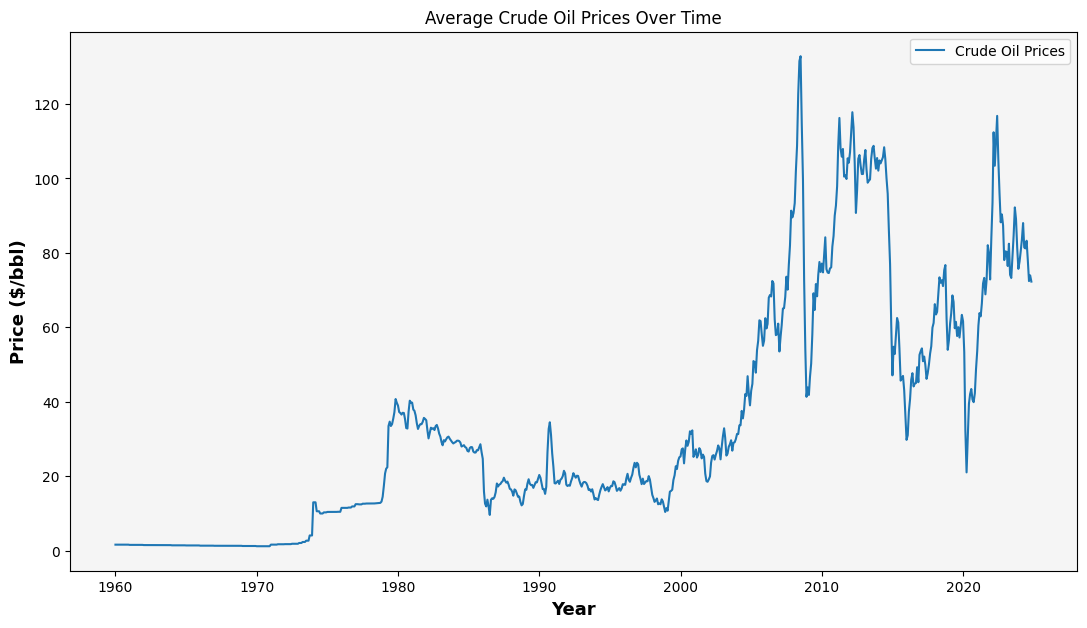

In [57]:
df['Date'] = pd.to_datetime(df['Year'], format='%YM%m') # Convert it to time instead of just shwoing numbers
df.set_index('Date', inplace=True) # Set Date column as index
plt.figure(figsize=(13,7))
plt.plot(df['Crude oil, average'], label='Crude Oil Prices')
plt.title('Average Crude Oil Prices Over Time')
plt.xlabel('Year', fontweight = 'bold', fontsize = '13')
plt.ylabel('Price ($/bbl)', fontweight = 'bold', fontsize = '13')
plt.legend()
plt.gca().set_facecolor('whitesmoke')

In [58]:
from statsmodels.tsa.stattools import adfuller # For Augmented Dicky Fuller Test

result = adfuller(df['Crude oil, average'])

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# This basically prints the statistics such as the p value to know if stationary or not.

if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

# In this case the p value was above 0.05, therefore the series is not stationary

ADF Statistic: -1.7166884853092654
p-value: 0.4225352266727478
Critical Values:
   1%: -3.4388489336836003
   5%: -2.865291103159288
   10%: -2.568767459327767
The series is not stationary.


In [59]:
df['Crude oil, average_diff'] = df['Crude oil, average'].diff().dropna()

from statsmodels.tsa.stattools import adfuller # For Augmented Dicky Fuller Test

result_diff = adfuller(df['Crude oil, average_diff'].dropna())

print(f'ADF Statistic: {result_diff[0]}')
print(f'p-value: {result_diff[1]}')
print('Critical Values:')
for key, value in result_diff[4].items():
    print(f'   {key}: {value}')

# This basically prints the statistics such as the p value to know if stationary or not.

if result_diff[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

# In this case the p value was under 0.05, therefore the series is stationary

ADF Statistic: -12.874913291563438
p-value: 4.792077333919793e-24
Critical Values:
   1%: -3.4388489336836003
   5%: -2.865291103159288
   10%: -2.568767459327767
The series is stationary.


Text(0.5, 1.0, 'ACF for Differenced Crude Oil Prices')

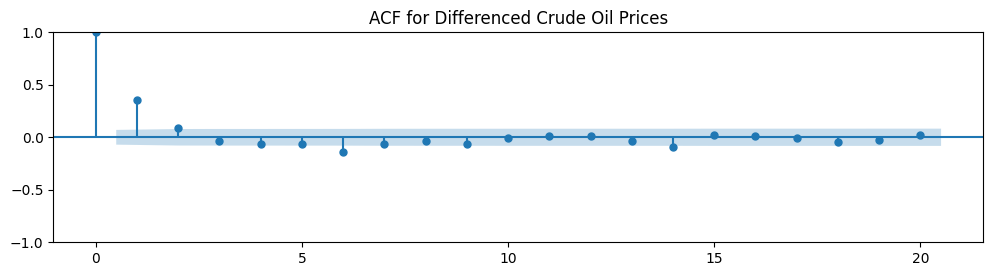

In [60]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF for differenced data
plt.figure(figsize=(12, 6))

# ACF Plot
plt.subplot(2, 1, 1)
plot_acf(df['Crude oil, average_diff'].dropna(), lags=20, ax=plt.gca())
plt.title('ACF for Differenced Crude Oil Prices')

# Gradually drops after 1.0 here ACF(1)

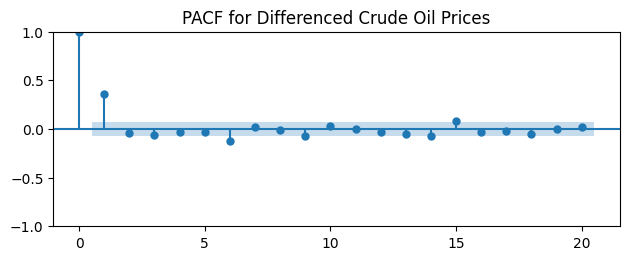

In [61]:
# PACF Plot
plt.subplot(2, 1, 2)
plot_pacf(df['Crude oil, average_diff'].dropna(), lags=20, ax=plt.gca())
plt.title('PACF for Differenced Crude Oil Prices')

plt.tight_layout()
plt.show()


# Gradually drops after 1.0 here PACF(1)

In [62]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA(1, 1, 0) model
model = ARIMA(df['Crude oil, average'], order=(1, 1, 0))
results = model.fit()

# Print model summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:     Crude oil, average   No. Observations:                  779
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2056.260
Date:                Fri, 07 Feb 2025   AIC                           4116.520
Time:                        15:53:58   BIC                           4125.834
Sample:                    01-01-1960   HQIC                          4120.103
                         - 11-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3565      0.015     23.931      0.000       0.327       0.386
sigma2        11.5647      0.273     42.404      0.000      11.030      12.099
Ljung-Box (L1) (Q):                   0.18   Jarque-

c:\Users\pc\OneDrive - Beirut Arab University\Desktop\Crude Oil Project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\pc\OneDrive - Beirut Arab University\Desktop\Crude Oil Project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\pc\OneDrive - Beirut Arab University\Desktop\Crude Oil Project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


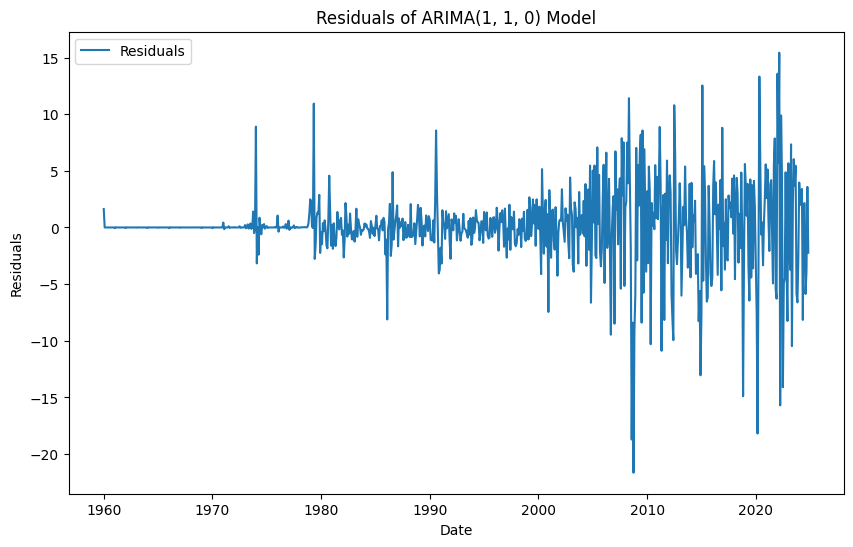

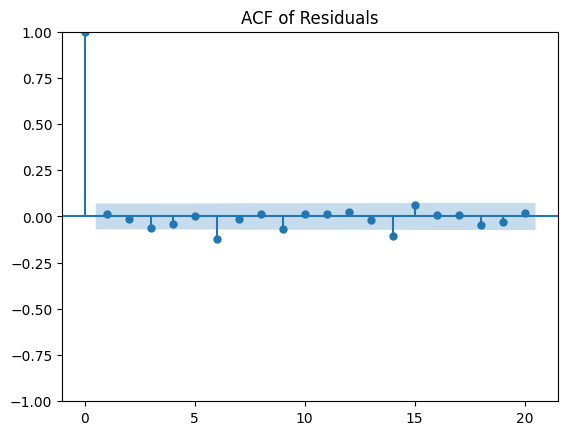

In [63]:
residuals = results.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals of ARIMA(1, 1, 0) Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()

plot_acf(residuals.dropna(), lags=20)
plt.title('ACF of Residuals')
plt.show()

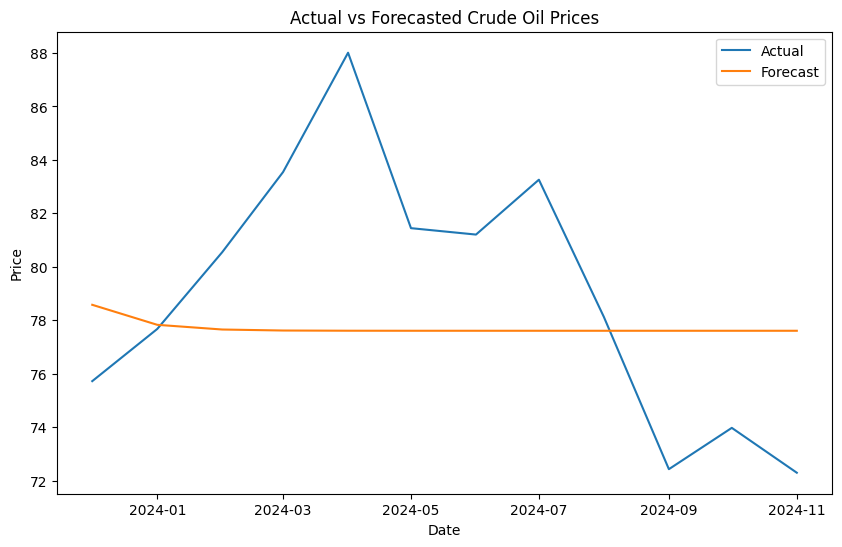

MAPE: 5.21%


In [70]:
import numpy as np

# Split data into train and test sets
train = df['Crude oil, average'][:-12]  # Use all but the last 12 months for training
test = df['Crude oil, average'][-12:]   # Last 12 months for testing


model = ARIMA(train, order=(2, 1, 0))
results = model.fit()

# Forecast
forecast = results.forecast(steps=12)



# Plot actual vs forecasted values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.title('Actual vs Forecasted Crude Oil Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Mape for accuracy testing, I got 5.21% here.
mape = np.mean(np.abs((test - forecast) / test)) * 100
print(f'MAPE: {mape:.2f}%')

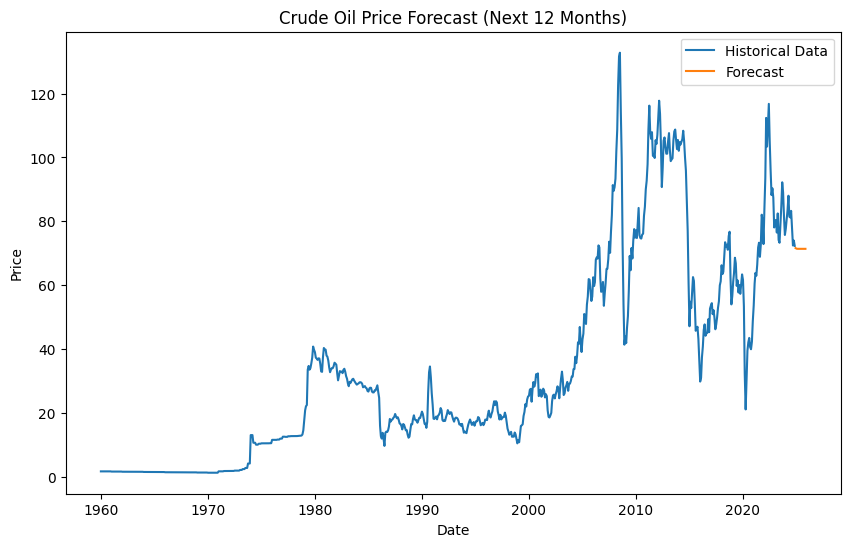

2024-12-01    71.603528
2025-01-01    71.418013
2025-02-01    71.377829
2025-03-01    71.370646
2025-04-01    71.369655
2025-05-01    71.369587
2025-06-01    71.369603
2025-07-01    71.369612
2025-08-01    71.369614
2025-09-01    71.369615
2025-10-01    71.369615
2025-11-01    71.369615
Freq: MS, Name: predicted_mean, dtype: float64


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


df.index = pd.date_range(start=df.index[0], periods=len(df), freq='MS')

# I Refit the model again but on the entire database instead of splitting it into training and testing sets.
final_model = ARIMA(df['Crude oil, average'], order=(2, 1, 0))
final_results = final_model.fit()

# Forecast for the next 12 months
future_forecast = final_results.forecast(steps=12)

# Final Forecast
plt.figure(figsize=(10, 6))
plt.plot(df['Crude oil, average'], label='Historical Data')
plt.plot(future_forecast.index, future_forecast, label='Forecast')
plt.title('Crude Oil Price Forecast (Next 12 Months)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Print the forecasted values
print(future_forecast)